In [1]:
#importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train

In [3]:
y = train["label"]
X = train.drop(["label"], axis = 1)

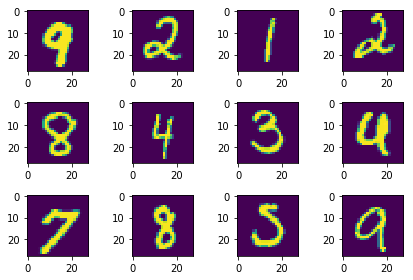

In [10]:
# PLOTTING THE DIGITS
for i in range(0,3):
    for j in range(0,4):
        index = random.randrange(0, len(X))
        plot = plt.subplot2grid((3, 4), (i, j))
        plot.imshow(X[index].reshape(28,28))

plt.tight_layout()
plt.show()

In [ ]:
X

In [5]:
# reshaping
X = X.values.reshape(-1,28,28,1)

In [ ]:
X

In [6]:
test = test.values.reshape(-1,28,28,1)

In [ ]:
test

In [7]:
# one hot encoding
y = to_categorical(y, num_classes=10)

In [8]:
# splitting training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,shuffle = True)

In [9]:
# building the CNN
# initializing the CNN
classifier = Sequential()
# step-1 convolution
classifier.add(Convolution2D(32,(3,3), input_shape = (28,28,1), activation = 'relu')) # input_shape = (image_height, image_width, channel)
# adding another convolution layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))
# step-2 MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Convolution2D(64,(3,3), activation = 'relu'))
classifier.add(Convolution2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
classifier.add(Dropout(0.5))
# step-3 Flattening
classifier.add(Flatten())
# step-4 full connection
# adding the hidden layer
classifier.add(Dense(8192, activation = 'relu'))
classifier.add(Dropout(0.5))
# adding the hidden layer
classifier.add(Dense(2048, activation = 'relu'))
classifier.add(Dropout(0.5))
# adding the output layer
classifier.add(Dense(10, activation = 'sigmoid'))

# CNN compilation
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# fitiing the CNN model

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=1,
                                    zoom_range=0.1, 
                                    width_shift_range=0.05,
                                    height_shift_range=0.05)
train_datagen.fit(X_train)

# Training
validation_generator = classifier.fit(train_datagen.flow(X_train,
                                                  y_train,
                                                  batch_size=512), epochs=10,
                                                  validation_data=(X_test, y_test),
                                                  verbose=1,
                                                  steps_per_epoch=X_train.shape[0] // 512,
                                                  )

Epoch 1/10
73/73 [==============================] - 73s 997ms/step - loss: 0.7266 - accuracy: 0.7580 - val_loss: nan - val_accuracy: 0.9102
Epoch 2/10
73/73 [==============================] - 70s 959ms/step - loss: 0.1746 - accuracy: 0.9459 - val_loss: nan - val_accuracy: 0.9112
Epoch 3/10
73/73 [==============================] - 70s 957ms/step - loss: 0.1234 - accuracy: 0.9618 - val_loss: nan - val_accuracy: 0.9600
Epoch 4/10
73/73 [==============================] - 70s 957ms/step - loss: 0.0991 - accuracy: 0.9688 - val_loss: nan - val_accuracy: 0.9581
Epoch 5/10
73/73 [==============================] - 70s 957ms/step - loss: 0.0867 - accuracy: 0.9728 - val_loss: nan - val_accuracy: 0.9705
Epoch 6/10
73/73 [==============================] - 70s 959ms/step - loss: 0.0771 - accuracy: 0.9763 - val_loss: nan - val_accuracy: 0.9781
Epoch 7/10
73/73 [==============================] - 71s 971ms/step - loss: 0.0697 - accuracy: 0.9785 - val_loss: nan - val_accuracy: 0.9748
Epoch 8/10
73/73 [==

In [14]:
predictions = classifier.predict_classes(test, verbose=1)



875/875 [==============================] - 22s 25ms/step


In [ ]:
submissions = pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
              "Label":predictions})

submissions.to_csv("submission.csv",
                    index=False,
                    header=True)
